In [7]:
import numpy as np

import qcodes as qc
%matplotlib notebook


In [2]:
from qcodes.instrument_drivers.unibasel.SP927 import SP927

dac = SP927("DAC","ASRL5::INSTR")


Connected to: ? None (serial:None, firmware:None) in 1.04s


In [3]:
dac.ch1.volt.set(5)

In [4]:
dac.ch1.volt.get()

5.0

In [12]:
dac.ch2.volt.get()

10.0

In [35]:
dac.ch1.volt.inter_delay=0.01
dac.ch1.volt.step=0.1

In [7]:
dac.ch1.volt.set(6)

In [8]:
from qcodes.tests.instrument_mocks import DummyInstrument

dmm = DummyInstrument(name="dmm", gates=['voltage'])  # The DMM voltage reader


In [3]:
from qcodes.instrument_drivers.stanford_research.SR830 import SR830

lockin = SR830(name="lockin",address="GPIB0::9::INSTR")

Connected to: Stanford_Research_Systems SR830 (serial:s/n47007, firmware:ver1.07) in 0.21s


c:\git_sync\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


<IPython.core.display.Javascript object>


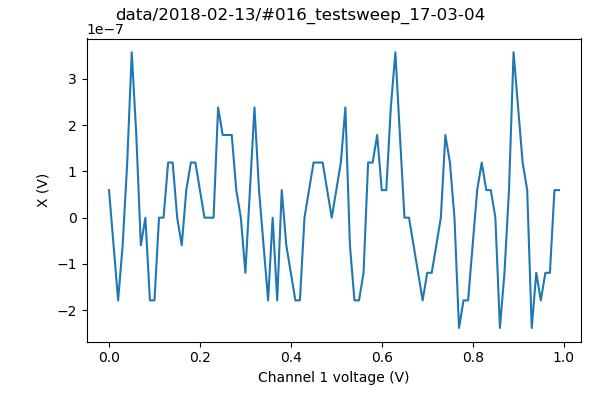

Started at 2018-02-13 17:03:04
DataSet:
   location = 'data/2018-02-13/#016_testsweep_17-03-04'
   <Type>   | <array_id>         | <array.name> | <array.shape>
   Setpoint | DAC_chan1_volt_set | volt         | (100,)
   Measured | lockin_X           | X            | (100,)
Finished at 2018-02-13 17:03:23


In [81]:
# realtime embedded plotting with matplotlib (needs %matplotlib notebook)

sweep_vals = dac.ch1.volt[0:1:0.01]

loop = qc.Loop(sweep_vals, delay=0.1).each(lockin.X)
data = loop.get_data_set(name='testsweep')

# Create plot for measured data
plot = qc.MatPlot(data.lockin_X)
# Attach updating of plot to loop
loop.with_bg_task(plot.update)

loop.run();

In [82]:
# plotting in separate window with qtplot
sweep_vals = dac.ch1.volt[0:1:0.01]

loop = qc.Loop(sweep_vals, delay=0.1).each(lockin.X)
data = loop.get_data_set(name='testsweep')

plot_1d = qc.QtPlot()  # create a plot
plot_1d.add(data.lockin_X)  # add a graph to the plot
_ = loop.with_bg_task(plot_1d.update).run()  # run the loop

Started at 2018-02-13 17:03:34
DataSet:
   location = 'data/2018-02-13/#017_testsweep_17-03-34'
   <Type>   | <array_id>         | <array.name> | <array.shape>
   Setpoint | DAC_chan1_volt_set | volt         | (100,)
   Measured | lockin_X           | X            | (100,)
Finished at 2018-02-13 17:03:50


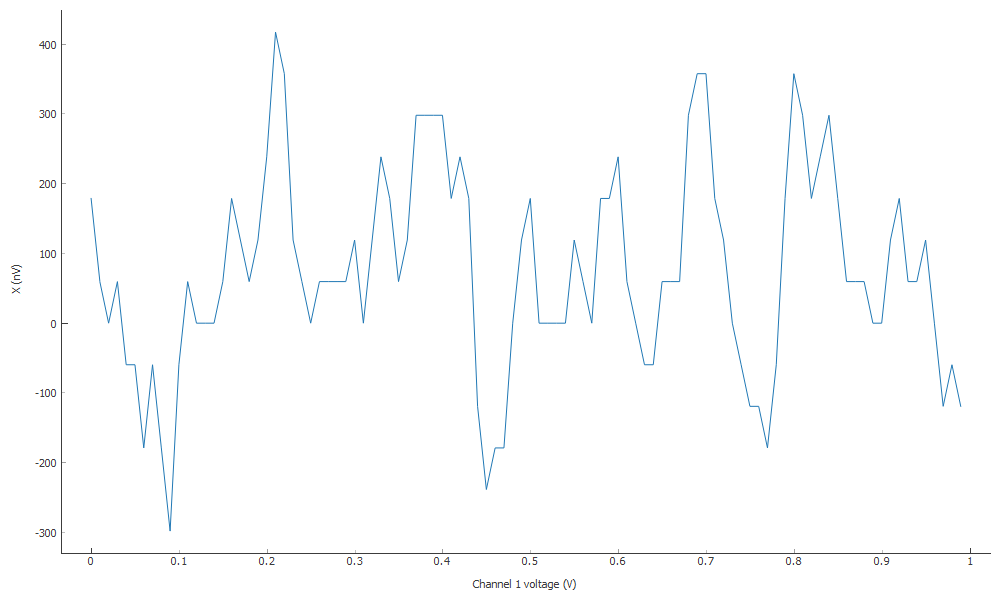

In [83]:
# recalling the plot
plot_1d

Back to MatPlot()

<IPython.core.display.Javascript object>


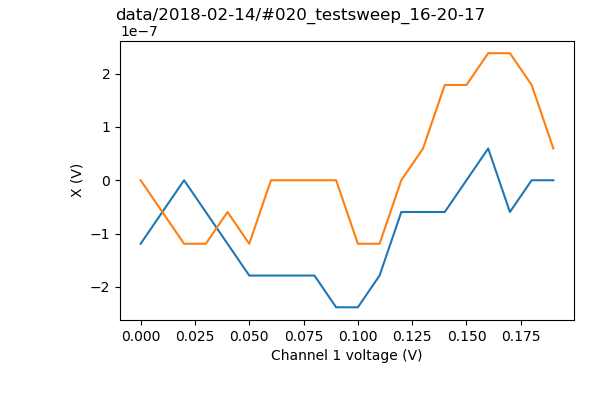

Started at 2018-02-14 16:20:17
DataSet:
   location = 'data/2018-02-14/#020_testsweep_16-20-17'
   <Type>   | <array_id>         | <array.name> | <array.shape>
   Setpoint | DAC_chan1_volt_set | volt         | (20,)
   Measured | lockin_X           | X            | (20,)
   Measured | lockin_Y           | Y            | (20,)
Finished at 2018-02-14 16:20:19


In [157]:
# multiple readout within the same graph
sweep_vals = dac.ch1.volt[0:0.2:0.01]

loop = qc.Loop(sweep_vals, delay=0.01).each(lockin.X, lockin.Y)
data = loop.get_data_set(name='testsweep')

plot_1d = qc.MatPlot()  # create a plot
plot_1d.add(data.lockin_X)  # add a graph to the plot
plot_1d.add(data.lockin_Y)  # add a graph to the plot

fig = plot_1d.fig
fig.subplots_adjust(left=0.2, bottom=0.2 )

_ = loop.with_bg_task(plot_1d.update).run()  # run the loop

<IPython.core.display.Javascript object>


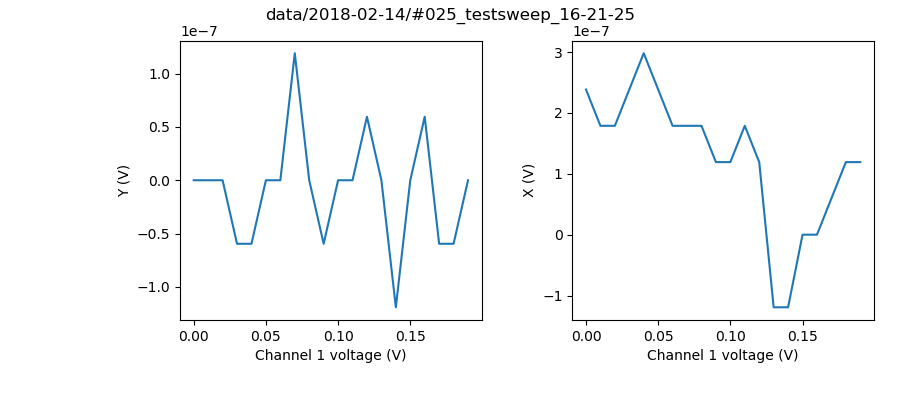

Started at 2018-02-14 16:21:25
DataSet:
   location = 'data/2018-02-14/#025_testsweep_16-21-25'
   <Type>   | <array_id>         | <array.name> | <array.shape>
   Setpoint | DAC_chan1_volt_set | volt         | (20,)
   Measured | lockin_X           | X            | (20,)
   Measured | lockin_Y           | Y            | (20,)
Finished at 2018-02-14 16:21:28


In [164]:
# multiple readout in different subplots
sweep_vals = dac.ch1.volt[0:0.2:0.01]

loop = qc.Loop(sweep_vals, delay=0.01).each(lockin.X, lockin.Y)
data = loop.get_data_set(name='testsweep')

plot_1d = qc.MatPlot(subplots=2)  # create a plot

plot_1d.add(data.lockin_X,subplot=0)
plot_1d.add(data.lockin_Y,subplot=1)

fig = plot_1d.fig
fig.subplots_adjust(left=0.2,bottom=0.2,wspace = 0.3)

_ = loop.with_bg_task(plot_1d.update).run()  # run the loop

<IPython.core.display.Javascript object>


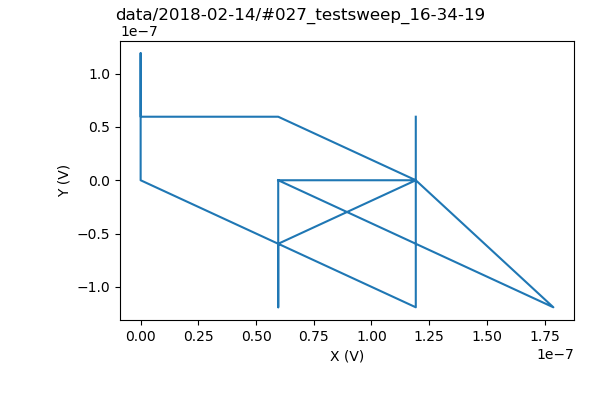

Started at 2018-02-14 16:34:19
DataSet:
   location = 'data/2018-02-14/#027_testsweep_16-34-19'
   <Type>   | <array_id>         | <array.name> | <array.shape>
   Setpoint | DAC_chan1_volt_set | volt         | (20,)
   Measured | lockin_X           | X            | (20,)
   Measured | lockin_Y           | Y            | (20,)
Finished at 2018-02-14 16:34:21


In [171]:
# 2 quantities as a function of each other

sweep_vals = dac.ch1.volt[0:0.2:0.01]

loop = qc.Loop(sweep_vals, delay=0.01).each(lockin.X, lockin.Y)
data = loop.get_data_set(name='testsweep')

plot_1d = qc.MatPlot()  # create a plot
plot_1d.add(data.lockin_X, data.lockin_Y)  # add a graph to the plot

fig = plot_1d.fig
fig.subplots_adjust(left=0.2, bottom=0.2 )

_ = loop.with_bg_task(plot_1d.update).run()  # run the loop

In [167]:
# read-out with scaling
# example: lock-in readout and conversion to conductance in units of 2e^2/h

class conductance_from_lockin(qc.MultiParameter):
    def __init__(self, scale_param):
        # only name, names, and shapes are required
        # this version returns two scalars (shape = `()`)
        super().__init__('conductance_from_lockin', names=('G', 'X'), shapes=((), ()),
                         labels=('Conductance', 'Raw voltage X'),
                         units=('2e^2/h', 'V'),
                         # including these setpoints is unnecessary here, but
                         # if you have a parameter that returns a scalar alongside
                         # an array you can represent the scalar as an empty sequence.
                         setpoints=((), ()),
                         docstring='Conductance converted from raw voltage measurement')
        self._scale_param = scale_param
    
    def get_raw(self):
        voltage = lockin.X.get()
        conductance = voltage * self._scale_param()
        return (conductance, voltage)

bias_voltage = qc.ManualParameter('bias voltage', initial_value=10e-6, units='V')
IVC_gain = qc.ManualParameter('IVC gain', initial_value=1e7)

scaler = 1/(bias_voltage*IVC_gain*75e-6)
conductance = conductance_from_lockin(scale_param=scaler)

my_station = qc.Station(bias_voltage, IVC_gain, lockin, dac)


In [168]:
conductance.get()

(7.947346666666666e-06, 5.96051e-08)

<IPython.core.display.Javascript object>


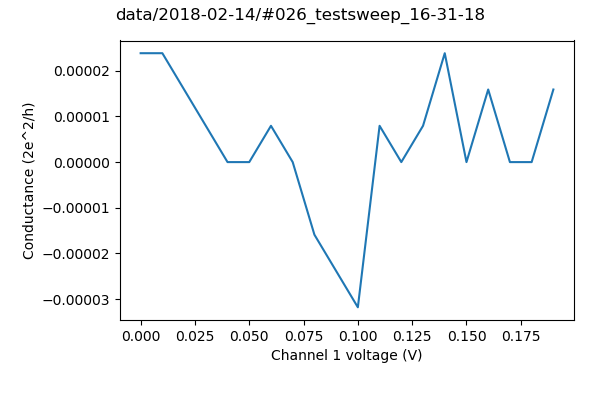

Started at 2018-02-14 16:31:18
DataSet:
   location = 'data/2018-02-14/#026_testsweep_16-31-18'
   <Type>   | <array_id>         | <array.name> | <array.shape>
   Setpoint | DAC_chan1_volt_set | volt         | (20,)
   Measured | G                  | G            | (20,)
   Measured | X                  | X            | (20,)
Finished at 2018-02-14 16:31:22


In [170]:
loop = qc.Loop(sweep_vals, delay=0.1, station = my_station).each(conductance)
data = loop.get_data_set(name='testsweep')

plot_1d = qc.MatPlot()  # create a plot
plot_1d.add(data.G)  # add a graph to the plot

fig = plot_1d.fig
fig.subplots_adjust(left=0.2, bottom=0.2)

_ = loop.with_bg_task(plot_1d.update).run()  # run the loop

# 2D maps

<IPython.core.display.Javascript object>


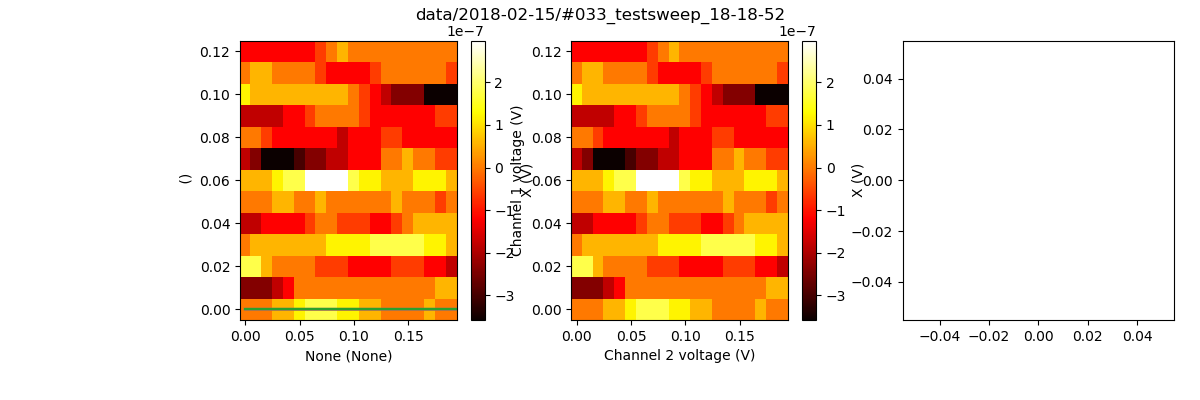

Started at 2018-02-15 18:18:52


C:\Users\meso\Anaconda3\envs\qcodes\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\meso\Anaconda3\envs\qcodes\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


DataSet:
   location = 'data/2018-02-15/#033_testsweep_18-18-52'
   <Type>   | <array_id>            | <array.name> | <array.shape>
   Setpoint | gate_voltage_volt_set | volt         | (20,)
   Setpoint | bias_voltage_volt_set | volt         | (20, 20)
   Measured | lockin_X              | X            | (20, 20)
Finished at 2018-02-15 18:19:07


KeyboardInterrupt: 

In [72]:
dac.ch1.name="gate_voltage"
dac.ch2.name="bias_voltage"

gate_voltage = dac.ch1.volt[0:0.2:0.01]
bias_voltage = dac.ch2.volt[0:0.2:0.01]

loop = qc.Loop(gate_voltage, delay=0.01).loop(bias_voltage,delay=0.01).each(lockin.X)

data = loop.get_data_set(name='testsweep')

plot = qc.MatPlot([*data.lockin_X],data.lockin_X,subplots=3) # create a plot
plot.add(data.lockin_X,subplot=1) # add a graph to the plot
#plot.add([*data.lockin_X],data.lockin_X,subplot=2) # add a graph to the plot
#plot.add([*np.transpose(data.lockin_X)],subplot=3) # add a graph to the plot

#plot.add(bias_voltage, [*data.lockin_X],subplot=1)  # add a graph to the plot

fig = plot.fig
fig.subplots_adjust(left=0.2, bottom=0.2 )

_ = loop.with_bg_task(plot.update).run()  # run the loop

In [42]:
data.bias_voltage_volt_set

DataArray[20,20]: bias_voltage_volt_set
array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
 

In [68]:
[*data.lockin_X]

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [ ]:
# todo:
# 2D maps
# force a wait at the beginning of a voltage bias slice
# fetch curves at once as the inner loop (e.g. from VNA)